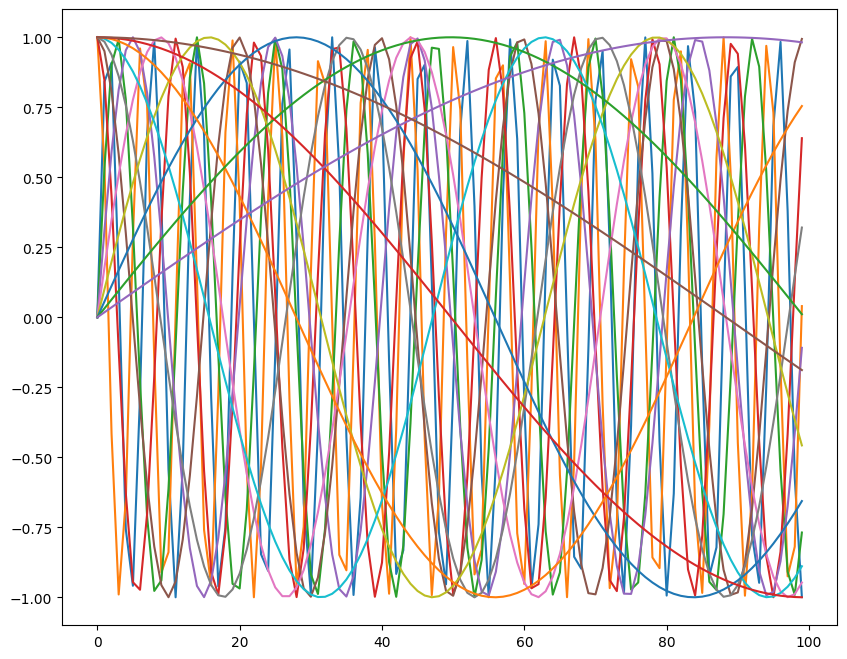

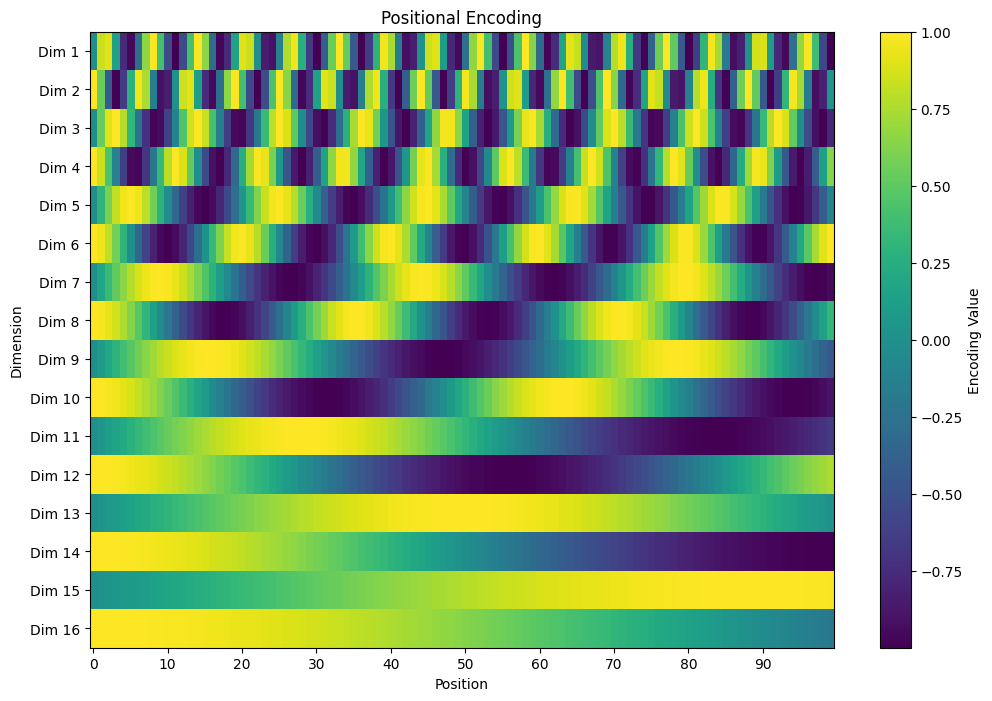

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Positional Encoding 함수 수정
def positional_encoding_fixed(pos, d_model):
    """
    pos: 위치 인덱스 (0부터 시작)
    d_model: 모델의 차원 수
    """
    position = pos[:, np.newaxis]
    div_term = np.exp(np.arange(0, d_model, 2) * -(np.log(100.0) / d_model))
    pe = np.zeros((len(pos), d_model))
    pe[:, 0::2] = np.sin(position * div_term)
    pe[:, 1::2] = np.cos(position * div_term[np.newaxis, :])
    return pe
 
# Positional Encoding 계산 (수정된 함수 사용)
pos = np.arange(100)  # 위치 인덱스
d_model = 16  # 모델의 차원
pe_fixed = positional_encoding_fixed(pos, d_model)
 
# 시각화 (수정된 데이터 사용)
plt.figure(figsize=(10, 8))
for i in range(d_model):
    plt.plot(pos, pe_fixed[:, i], label=f"Dim {i+1}")
 
# 명암으로 시각화하기
plt.figure(figsize=(12, 8))
plt.imshow(pe_fixed.T, cmap='viridis', aspect='auto')
plt.colorbar(label='Encoding Value')
plt.yticks(range(d_model), [f"Dim {i+1}" for i in range(d_model)])
plt.xticks(range(0, len(pos), len(pos)//10), [str(i) for i in range(0, len(pos), len(pos)//10)])
plt.xlabel("Position")
plt.ylabel("Dimension")
plt.title("Positional Encoding")
plt.show()

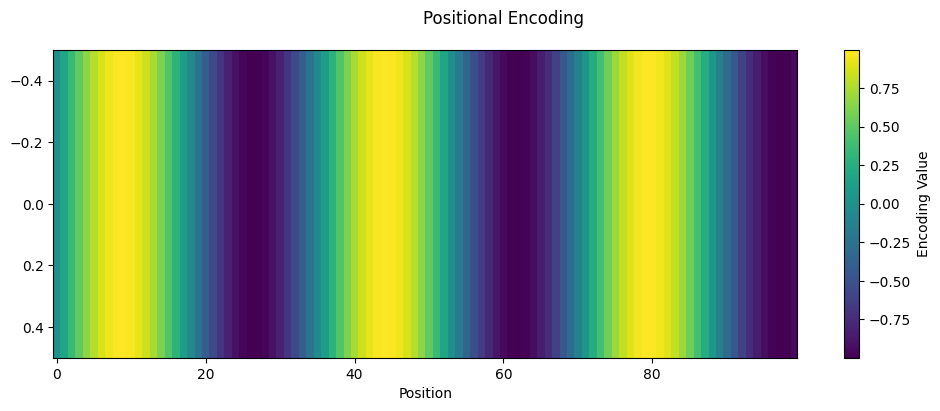

In [21]:
# 특정 차원(Dimension)만 시각화하기
# 예를 들어, 3번째와 4번째 차원만 보고 싶다면:
selected_dims = [6]  # Python의 인덱스는 0부터 시작하므로, 3번째와 4번째 차원은 인덱스로 2와 3입니다.
 
plt.figure(figsize=(12, 4))
for i, dim in enumerate(selected_dims):
    plt.subplot(1, len(selected_dims), i+1)
    plt.imshow(pe_fixed.T[dim:dim+1], cmap='viridis', aspect='auto')
    plt.colorbar(label='Encoding Value')
    # plt.yticks([0], [f"Dim {dim+1}"])
    # plt.xticks(range(0, len(pos), len(pos)//10), [str(i) for i in range(0, len(pos), len(pos)//10)])
    plt.xlabel("Position")
    # if i == 0:
        # plt.ylabel("Dimension")
 
plt.suptitle("Positional Encoding")
plt.show()